# **TELCOM CUSTOMER CHURN**

Customers in the telecom industry can choose from a variety of service providers and actively switch from one to the next. The telecommunications business has an annual churn rate of 15-25 percent in this highly competitive market.

Individualized customer retention is tough because most firms have a large number of customers and can't afford to devote much time to each of them. The costs would be too great, outweighing the additional revenue. However, if a corporation could forecast which customers are likely to leave ahead of time, it could focus customer retention efforts only on these "high risk" clients. The ultimate goal is to expand its coverage area and retrieve more customers loyalty. The core to succeed in this market lies in the customer itself.

Customer churn is a critical metric because it is much less expensive to retain existing customers than it is to acquire new customers.


To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

To detect early signs of potential churn, one must first develop a holistic view of the customers and their interactions across numerous channels, including store/branch visits, product purchase histories, customer service calls, Web-based transactions, and social media interactions, to mention a few.

As a result, by addressing churn, these businesses may not only preserve their market position, but also grow and thrive. More customers they have in their network, the lower the cost of initiation and the larger the profit. As a result, the company's key focus for success is reducing client attrition and implementing effective retention strategy.


**Objectives**

In this notebook, we going to;
- Some model prediction
- Find the best model, tune it and find the best estimators
- Find the most important features in regard to churning 


##LOAD LIBRARIES AND DATA

In [134]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from math import * # module math
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization
import itertools
import io
import plotly.offline as py # visualization
import plotly.graph_objs as go # visualization
from plotly.subplots import make_subplots
import plotly.figure_factory as ff # visualization
import warnings
warnings.filterwarnings("ignore")

The data set includes information about;

- Customers who left within the last month – the column is called Customer Status (Stayed or Churned)

- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

- Customer account information - how long they’ve been a customer (tenure), contract, payment method, paperless billing, monthly charges, and total charges

- Demographic info about customers – gender, age range, and if they have partners, referrals, multiple lines and dependents

In [135]:
df = pd.read_excel("/content/telecom_churn.xlsx")
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Customer Status
0,0002-ORFBO,Female,37,Yes,0,2,9,Yes,42.39,No,...,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,Stayed
1,0003-MKNFE,Male,46,No,0,0,9,Yes,10.69,Yes,...,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,542.40,Stayed
2,0004-TLHLJ,Male,50,No,0,0,4,Yes,33.65,No,...,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,Churned
3,0011-IGKFF,Male,78,Yes,0,1,13,Yes,27.82,No,...,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,Churned
4,0013-EXCHZ,Female,75,Yes,0,3,3,Yes,7.38,No,...,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,Churned


In [136]:
df.shape

(7043, 25)

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   Number of Referrals                7043 non-null   int64  
 6   Tenure in Months                   7043 non-null   int64  
 7   Phone Service                      7043 non-null   object 
 8   Avg Monthly Long Distance Charges  7043 non-null   float64
 9   Multiple Lines                     7043 non-null   object 
 10  Internet Service                   7043 non-null   object 
 11  Online Security                    7043 non-null   objec

In [138]:
df.dtypes

Customer ID                           object
Gender                                object
Age                                    int64
Married                               object
Number of Dependents                   int64
Number of Referrals                    int64
Tenure in Months                       int64
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming TV                          object
Streaming Movies                      object
Streaming Music                       object
Unlimited Data                        object
Contract                              object
Paperless Billing                     object
Payment Method                        object
Monthly Ch

- The target we are going to use here is ***Customer Status***

### DATA MANIPULATION

In [139]:
## DATA MANIPULATION
df = df.drop(['Customer ID'], axis = 1)
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
df.isnull().sum()

Gender                               0
Age                                  0
Married                              0
Number of Dependents                 0
Number of Referrals                  0
Tenure in Months                     0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing                    0
Payment Method                       0
Monthly Charge                       0
Total Charges                        0
Customer Status                      0
dtype: int64

There is no missing values,  that's great!. Lets proceed.


## **DATA PREPROCCESSING**

In [140]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report, roc_auc_score

In [141]:
# Encode categorical data 
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [142]:
df = df.apply(lambda x: object_to_int(x))
df.head()

,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,...,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Customer Status
0,0,37,1,0,2,9,1,42.39,0,0,...,2,0,0,2,1,1,1,65.6,593.30,1
1,1,46,0,0,0,9,1,10.69,2,0,...,0,2,2,0,0,0,1,-4.0,542.40,1
2,1,50,0,0,0,4,1,33.65,0,2,...,0,0,0,2,0,1,0,73.9,280.85,0
3,1,78,1,0,1,13,1,27.82,0,2,...,2,2,0,2,0,1,0,98.0,1237.85,0
4,0,75,1,0,3,3,1,7.38,0,2,...,2,0,0,2,0,1,1,83.9,267.40,0


In [143]:
X = df.drop(columns = ['Customer Status'])
Y = df['Customer Status'].values

In [144]:
#Splitting data set into test set and train set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.20, random_state = 40, stratify=Y)

In [145]:
num_cols = ["Tenure in Months", 'Avg Monthly Long Distance Charges', 'Monthly Charge', 'Total Charges']
df_std = pd.DataFrame(StandardScaler().fit_transform(df[num_cols].astype('float64')),
                       columns=num_cols)

In [146]:
#Seperating columns 
cat_cols1 =['PaymentMethod', 'Contract', 'InternetService'] # those that need one-hot encoding
cat_cols_le = list(set(X_train.columns)- set(num_cols) - set(cat_cols1)) #those that need label encoding

In [147]:
#Scaling Numerical columns
std = StandardScaler()
X_train[num_cols] = std.fit_transform(X_train[num_cols])
X_train[num_cols] = pd.DataFrame(X_train[num_cols], columns=num_cols)

X_test[num_cols] = std.transform(X_test[num_cols])
X_test[num_cols] = pd.DataFrame(X_test[num_cols], columns=num_cols)

### LOGISTIC REGRESSION

In [148]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train,Y_train)
lr_pred= lr_model.predict(X_test)
accuracy_lr = lr_model.score(X_test,Y_test)
lr_auc = roc_auc_score(Y_test, lr_pred)
print("Logistic Regression accuracy is :",accuracy_lr)
print("Logistic Regression roc_auc_score is :",lr_auc)

Logistic Regression accuracy is : 0.8353442157558553
Logistic Regression roc_auc_score is : 0.7760740396290267


In [149]:
lr_pred= lr_model.predict(X_test)
report = classification_report(Y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.71      0.65      0.68       374
           1       0.88      0.90      0.89      1035

    accuracy                           0.84      1409
   macro avg       0.79      0.78      0.78      1409
weighted avg       0.83      0.84      0.83      1409



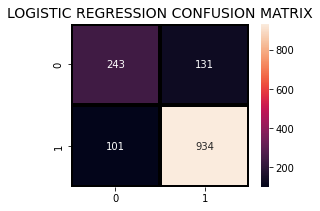

In [150]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(Y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

### DECISION  TREES

In [151]:
#Decision Tree
dt_model = DecisionTreeClassifier(max_depth = 9, random_state = 123,
                                       splitter = "best", criterion = "gini")
dt_model.fit(X_train,Y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,Y_test)
print("Decision Tree accuracy is :",accuracy_dt)
dt_auc = roc_auc_score(Y_test, predictdt_y)
print("Decision Tree roc_auc_score is :",dt_auc)

Decision Tree accuracy is : 0.8246983676366217
Decision Tree roc_auc_score is : 0.7543129504766334


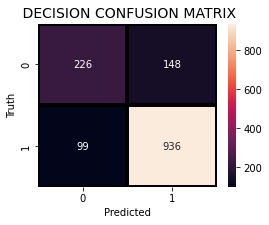

In [152]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(Y_test, predictdt_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" DECISION CONFUSION MATRIX",fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

### KNN

In [153]:
#KNN
knn_model = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
                           weights='uniform') 
knn_model.fit(X_train,Y_train)
predicted_Y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,Y_test)
print("KNN accuracy:",accuracy_knn)
knn_auc = roc_auc_score(Y_test, predicted_Y)
print("KNN roc_auc_score is :",knn_auc)

KNN accuracy: 0.8105039034776437
KNN roc_auc_score is : 0.7506277609858173


In [154]:
print(classification_report(Y_test, predicted_Y))

              precision    recall  f1-score   support

           0       0.65      0.62      0.64       374
           1       0.87      0.88      0.87      1035

    accuracy                           0.81      1409
   macro avg       0.76      0.75      0.75      1409
weighted avg       0.81      0.81      0.81      1409



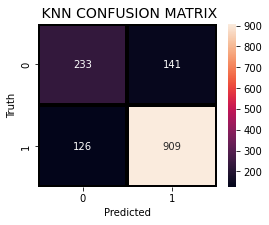

In [155]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(Y_test, predicted_Y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" KNN CONFUSION MATRIX",fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

Here it says, 233 customers churned and the Random forest model predicted that they would churn and 126 customers stayed when the model predicted that they would churn.The model also predicted 909 customers would stay and they stayed and 141 customers churned when the model predicted they would stay.



### SUPPORT VECTOR MACHINE

In [156]:
#Support Vector Machine
svc_model = SVC(C=1.0, kernel='linear', probability=True, random_state=124)
svc_model.fit(X_train,Y_train)
predict_Y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,Y_test)
print("SVM accuracy is :",accuracy_svc)
svc_auc = roc_auc_score(Y_test, predict_Y)
print("SVM roc_auc_score is :",svc_auc)

SVM accuracy is : 0.8282469836763662
SVM roc_auc_score is : 0.7755121547960422


In [157]:
print(classification_report(Y_test, predict_Y))

              precision    recall  f1-score   support

           0       0.68      0.66      0.67       374
           1       0.88      0.89      0.88      1035

    accuracy                           0.83      1409
   macro avg       0.78      0.78      0.78      1409
weighted avg       0.83      0.83      0.83      1409



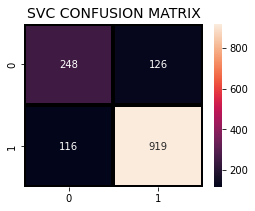

In [158]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(Y_test, predict_Y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("SVC CONFUSION MATRIX",fontsize=14)
plt.show()

### RANDOM FOREST CLASSIFIER

In [159]:
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, Y_train)
predictrf_y = model_rf.predict(X_test)
accuracy_rf = model_rf.score(X_test,Y_test)
print("Random Forest accuracy is :",accuracy_rf)
rf_auc = roc_auc_score(Y_test, predictrf_y)
print("Random Forest roc_auc_score is :",rf_auc)

Random Forest accuracy is : 0.843860894251242
Random Forest roc_auc_score is : 0.7682102353457853


In [160]:
print(classification_report(Y_test, predictrf_y))

              precision    recall  f1-score   support

           0       0.76      0.61      0.67       374
           1       0.87      0.93      0.90      1035

    accuracy                           0.84      1409
   macro avg       0.81      0.77      0.79      1409
weighted avg       0.84      0.84      0.84      1409



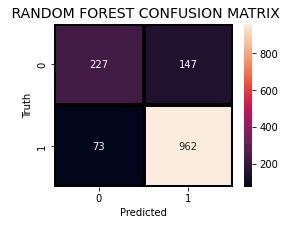

In [161]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(Y_test, predictrf_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

Here we it says, **227 customers churned** and the Random forest model predicted that they would churn and **73 customers stayed** when the model predicted that they would churn.

The model also predicted 9**62 customers would stay** and they stayed and **147 customers churned** when the model predicted they would stay.

### ADA BOOSTING CLASSIFIER

In [162]:
#Ada_Boost Classifier
a_model = AdaBoostClassifier(random_state=100)
a_model.fit(X_train,Y_train)
a_preds = a_model.predict(X_test)
accuracy_a = a_model.score(X_test,Y_test)
print("AdaBoost Classifier accuracy;", accuracy_a)
a_auc = roc_auc_score(Y_test, a_preds)
print("AdaBoost roc_auc_score is :",a_auc)

AdaBoost Classifier accuracy; 0.8424414478353442
AdaBoost roc_auc_score is : 0.7885892169779638


In [163]:
print(classification_report(Y_test, a_preds))

              precision    recall  f1-score   support

           0       0.72      0.67      0.69       374
           1       0.88      0.90      0.89      1035

    accuracy                           0.84      1409
   macro avg       0.80      0.79      0.79      1409
weighted avg       0.84      0.84      0.84      1409



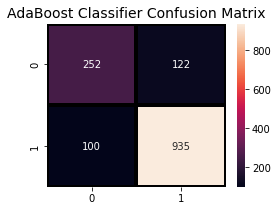

In [164]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(Y_test, a_preds),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("AdaBoost Classifier Confusion Matrix",fontsize=14)
plt.show()

### GRADIENT BOOSTING CLASSIFIER

In [165]:
#Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=150)
gb_model.fit(X_train, Y_train)
gb_pred = gb_model.predict(X_test)
accuracy_gb = gb_model.score(X_test,Y_test)
print("Gradient Boosting Classifier", accuracy_gb)
gb_auc = roc_auc_score(Y_test, gb_pred)
print("Gradient Boosting roc_auc_score is :",gb_auc)

Gradient Boosting Classifier 0.8566359119943222
Gradient Boosting roc_auc_score is : 0.8016662791598853


In [166]:
print(classification_report(Y_test, gb_pred))

              precision    recall  f1-score   support

           0       0.75      0.68      0.72       374
           1       0.89      0.92      0.90      1035

    accuracy                           0.86      1409
   macro avg       0.82      0.80      0.81      1409
weighted avg       0.85      0.86      0.85      1409



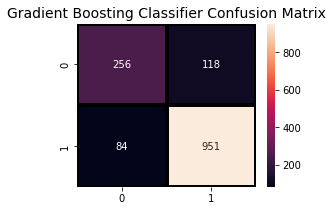

In [167]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(Y_test, gb_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Gradient Boosting Classifier Confusion Matrix",fontsize=14)
plt.show()

#### ACCURACY COMPARISON

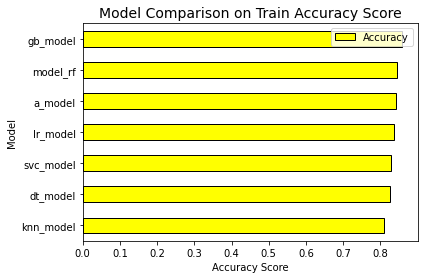

In [168]:
# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['lr_model', 'dt_model', 'svc_model',
                                           'knn_model', 'model_rf',
                                            'gb_model', 'a_model'],
                                 'Accuracy': [accuracy_lr,accuracy_dt,accuracy_svc,accuracy_knn,accuracy_rf,accuracy_gb,accuracy_a]})

# Horizontal bar chart of train accuracy
model_comparison.sort_values('Accuracy').plot(x = 'model', y = 'Accuracy', 
                                kind = 'barh',color = 'Yellow', edgecolor = 'black')
# Plot formatting
plt.ylabel('Model'); plt.yticks(size = 10); plt.xlabel('Accuracy Score'); plt.xticks(size = 10)
plt.title('Model Comparison on Train Accuracy Score', size = 14);

From the bar graph above, we can see that the Gradient Boosting classifier has the best accuracy performance on the train data. However since the data has a class imbalance in the customer churn variable, we shall use the roc_auc metric to select the best model for evaluation performance.





We are going to use a bar graph below to visualise the model that produced the highest roc_auc, which will become the model that we shall tune for our classification problem.

#### ROC_AUC COMPARISON

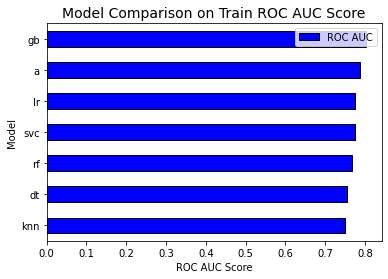

In [169]:
ROC_AUC_Comparison = pd.DataFrame({'model': ['lr', 'dt', 'svc',
                                           'knn', 'rf',
                                            'gb', 'a'],
                                 'ROC AUC': [lr_auc,dt_auc,svc_auc,knn_auc,rf_auc,gb_auc,a_auc]})

# Horizontal bar chart of train accuracy
ROC_AUC_Comparison.sort_values('ROC AUC').plot(x = 'model', y = 'ROC AUC', 
                                kind = 'barh',color = 'Blue', edgecolor = 'black')
# Plot formatting
plt.ylabel('Model'); plt.yticks(size = 10); plt.xlabel('ROC AUC Score'); plt.xticks(size = 10)
plt.title('Model Comparison on Train ROC AUC Score', size = 14);

The best performing model is **Gradient Boosting classifiers**

Lets consider this model and furthure tune it them to find out how better it performs. We shall use grid and random search to find optimum parameters

### MODEL TUNING

In [170]:
GBmodel = GradientBoostingClassifier(random_state=1)
# parameter grid

parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.5, 0.1, 0.2],
    "min_samples_leaf": [2,3,4,6],
    "max_depth":[3,5,7,10,15],
    "max_features":["log2","sqrt"],
     'subsample': [0.6,0.7,0.8],
    "n_estimators":[300,400,500,800,1000]
     }

In [171]:
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=GBmodel,
                               param_distributions=parameters,
                               scoring='roc_auc',
                               cv=5, n_iter=30, 
                               n_jobs = 4, verbose = 1,
                               random_state=30)

In [172]:
random_cv.fit(X_train,Y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=1),
                   n_iter=30, n_jobs=4,
                   param_distributions={'learning_rate': [0.01, 0.5, 0.1, 0.2],
                                        'loss': ['deviance'],
                                        'max_depth': [3, 5, 7, 10, 15],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [2, 3, 4, 6],
                                        'n_estimators': [300, 400, 500, 800,
                                                         1000],
                                        'subsample': [0.6, 0.7, 0.8]},
                   random_state=30, scoring='roc_auc', verbose=1)

In [173]:
random_cv.best_params_

{'learning_rate': 0.01,
 'loss': 'deviance',
 'max_depth': 7,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'n_estimators': 800,
 'subsample': 0.6}

In [174]:
random_cv.best_score_
print('New Gradient Boosting Accuracy Score is ', random_cv.best_score_)

New Gradient Boosting Accuracy Score is  0.9067796216784864


In [175]:
#Retrainig our model with grid search to optimize it's performance by varying the estimaators
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [200,300,400,500 ],"max_features":["log2","sqrt"]}
GBmodel =  GradientBoostingClassifier(max_depth=3,
                                   loss = 'deviance',
                                   subsample=0.6,
                                   learning_rate=0.01,
                                   min_samples_leaf = 6,
                                  random_state = 123)
grid_clf =GridSearchCV(GradientBoostingClassifier(random_state=1), 
                   param_grid,scoring='roc_auc',cv=5, n_jobs=4)

In [176]:
grid_clf.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=1),
             n_jobs=4,
             param_grid={'max_features': ['log2', 'sqrt'],
                         'n_estimators': [200, 300, 400, 500]},
             scoring='roc_auc')

In [179]:
grid_clf.best_estimator_

GradientBoostingClassifier(max_features='log2', n_estimators=300,
                           random_state=1)

In [180]:
grid_clf.best_score_

0.9090290433947216

Initial Gradient Boosting classifier with default hyperparameter values reached 85% accuracy on the test. Using random search we were able to tune selected hyperparameters and increased accuracy to 90.6%. Next, we did the samenjob using grid search and we increased accuracy to 90.9%



In [181]:
final_GBmodel=grid_clf.best_estimator_
GBC_pred=final_GBmodel.predict_proba(X_test)[:,1] #predict probabilities for positive class
GBC_pred = np.where(GBC_pred > 0.5, 1,0) #threshold the probabilities to give class predictions
print(classification_report(Y_test,GBC_pred))

              precision    recall  f1-score   support

           0       0.75      0.68      0.71       374
           1       0.89      0.92      0.90      1035

    accuracy                           0.85      1409
   macro avg       0.82      0.80      0.81      1409
weighted avg       0.85      0.85      0.85      1409



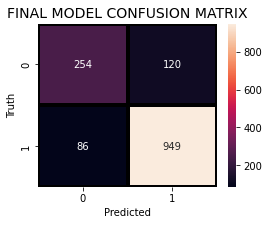

In [182]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(Y_test, GBC_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("FINAL MODEL CONFUSION MATRIX",fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

From the heatmap above, we can see that the model classified 120 customers as churned when in truth they stayed with the telcom and classified 86 as stayed when in truth they actually churned the telecom.

#### Features that contribute the most to churn

In [177]:
! pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [178]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(final_GBmodel, random_state=1).fit(X_test, Y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0573 ± 0.0150,Contract
0.0382 ± 0.0080,Number of Referrals
0.0219 ± 0.0086,Monthly Charge
0.0160 ± 0.0079,Age
0.0143 ± 0.0107,Number of Dependents
0.0123 ± 0.0091,Tenure in Months
0.0098 ± 0.0077,Streaming Music
0.0072 ± 0.0096,Married
0.0058 ± 0.0064,Online Security
0.0050 ± 0.0052,Payment Method


We can see that Contract, Number of referrals and Monthly Charges are the three most important features that this model considered in classifying which customers will churn or not.

Customer churn is definitely bad to a firm’s profitability. Various strategies can be implemented to eliminate customer churn. The best way to avoid customer churn is for a company to truly know its customers. This includes identifying customers who are at risk of churning and working to improve their satisfaction. Improving customer service is, of course, at the top of the priority for tackling this issue. Building customer loyalty through relevant experiences and specialized service is another strategy to reduce customer churn. Some firms survey customers who have already churned to understand their reasons for leaving in order to adopt a proactive approach to avoiding future customer churn.

We have been dealing with unbalanced data, we can do the same thing again with balanced and see model performance